**Source**: [Neural Networks and Deep Learning - Chapter 1](http://neuralnetworksanddeeplearning.com/chap1.html)

### 🧠 Sigmoid Neuron

A **sigmoid neuron** takes inputs in the range [0, 1] and outputs a value between 0 and 1, using the sigmoid activation function.

The sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

---

### 🧱 Neural Network Layers

- **Input Layer**: Contains *input neurons*
- **Hidden (Middle) Layer**: Contains *hidden neurons*
- **Output Layer**: Contains *output neurons*

---

### 🔻 Gradient Descent

Let:
- $x$ be the training input  
- $y = y(x)$ be the corresponding desired output  
- $a$ be the actual output of the network  

The **cost function** is defined as:

$$
C(w, b) = \frac{1}{2n} \sum_x \| y(x) - a \|^2
$$

Suppose we simplify notation by writing $(w, b) \rightarrow (v_1, v_2)$.  
Then the change in cost is approximately:

$$
\Delta C \approx \frac{\partial C}{\partial v_1} \Delta v_1 + \frac{\partial C}{\partial v_2} \Delta v_2
$$

We want to choose $\Delta v_1$ and $\Delta v_2$ such that $\Delta C < 0$ (i.e., the cost decreases).

Define:
- $\Delta v \equiv \begin{pmatrix} \Delta v_1 \\ \Delta v_2 \end{pmatrix}$
- $\nabla C \equiv \begin{pmatrix} \frac{\partial C}{\partial v_1} \\ \frac{\partial C}{\partial v_2} \end{pmatrix}$

Then:

$$
\Delta C \approx \nabla C \cdot \Delta v
$$

To ensure the cost decreases, we choose:

$$
\Delta v = -\eta \nabla C
$$

where $\eta$ is a small positive number called the *learning rate*. Substituting, we get:

$$
\Delta C \approx -\eta \nabla C \cdot \nabla C = -\eta \| \nabla C \|^2
$$

Since $\| \nabla C \|^2 \geq 0$, this guarantees:

$$
\Delta C \leq 0
$$

So, the cost function $C$ always decreases (or remains the same), and the update rule becomes:

$$
v \rightarrow v' = v - \eta \nabla C
$$

This can be extended to functions with any number of variables.


Excercise 1: The goal is to minimize the cost $C$ in such a way that the cost $C$ goes down as much as possible. Let's the limit the size of the change to a fixed value, $ \|\Delta v\| = \epsilon$. As a first order of approximation $\Delta C \approx  \nabla C \cdot \Delta v$. Now the objective is to choose a vector $\Delta v$ of fixed length $\epsilon$ that minimizes $\nabla C \cdot \Delta v$. The dot product of $\nabla C \cdot \Delta v$ is $\|\nabla C\|\cdot \|\Delta v\| \cos(\theta)$. To minimize this, $\cos(\theta) = -1$ since $ \|\Delta v\| = \epsilon$, the smallest value of the dot product is $-\|\nabla C\|\cdot \epsilon$, hence $\eta = \epsilon / \|\nabla C\|$.

Excecise 2: For $1D$, the "gradient" is just the slope of the line.

### 🔁 Gradient Descent (Component-wise Update)

When using gradient descent to minimize a cost function $C$, we update each **weight** $w_k$ and **bias** $b_l$ individually using the gradients of the cost function:

$$
w_k \rightarrow w_k' = w_k - \eta \frac{\partial C}{\partial w_k}
$$

$$
b_l \rightarrow b_l' = b_l - \eta \frac{\partial C}{\partial b_l}
$$

where:
- $\eta$ is the **learning rate**,
- $\frac{\partial C}{\partial w_k}$ and $\frac{\partial C}{\partial b_l}$ are the **partial derivatives** of the cost function with respect to each parameter.

---

### 🎲 Stochastic Gradient Descent (SGD)

Instead of computing the full gradient $\nabla C$ over the entire dataset (which can be computationally expensive), **Stochastic Gradient Descent** estimates it using a small, randomly selected subset (mini-batch) of the training data.

We approximate the true gradient:

$$
\nabla C \approx \frac{1}{m} \sum_{j=1}^{m} \nabla C_{x_j}
$$

where:
- $m$ is the **mini-batch size**,
- $x_j$ is the $j$-th example in the mini-batch,
- $\nabla C_{x_j}$ is the gradient computed for the individual training example $x_j$.

This is an approximation to the full batch gradient:

$$
\nabla C = \frac{1}{n} \sum_{x} \nabla C_x
$$

---

### 🧮 SGD Component-wise Update Rules

Using the estimated gradient from the mini-batch, we update the weights and biases as:

$$
w_k \rightarrow w_k' = w_k - \frac{\eta}{m} \sum_{j=1}^{m} \frac{\partial C_{x_j}}{\partial w_k}
$$

$$
b_l \rightarrow b_l' = b_l - \frac{\eta}{m} \sum_{j=1}^{m} \frac{\partial C_{x_j}}{\partial b_l}
$$

This speeds up training and helps the model generalize better due to the noise introduced by random sampling.


Backpropagation Algorithm: 

- Input $x$: Set the corresponding activation $a^1$ for the input layer 
- Feedforward: For each layer $l \in [2, L]$ (layer 1 is for input) compute $z^l = w^la^{l - 1} + b^l$ and $a^l = \sigma(z^l)$
- Ouput Error $\delta^L$: Compute, $\delta^L = \nabla_aC \odot \sigma'(z^L)$
- Backpropagate the error: For each $l$ in $\{L-1, L-2, \cdots 2\}$ compute $\delta^l = ((w^{l+1})^T\delta^{l + 1}) \odot \sigma'(z^l)$
-  The gradient of the cost function is given by 
$\frac{\partial C}{\partial w_{jk}^l} = a_k^{l-1} \delta_j^l \quad \text{and} \quad \frac{\partial C}{\partial b_j^l} = \delta_j^l$
- Gradient Descent: Update the $w^l$ and $b^l$

Cross Entropy Cost Function: Four regularization methods-
- L1 & L2 regularization 
- Dropout 
- Artificial expansion of    


L2 Regularization: The idea of L2 regularization is to add an extra term to the cost function, a term called the regularization term. Here is the regularized cross-entropy:

$C = \frac{1}{n} \sum_{xj}[y_j \ln a_j^L + (1 - y_j) \ln(a_j^L)] + \frac{\lambda}{2n}\sum_w w^2$

- First term is the usual expression for the cross entropy
- $C = C_0 + \frac{\lambda}{2n}\sum_w w^2$
- Regularization does not chose biases
- $W \leftarrow (1- \frac{\eta\lambda}{n})w - \eta\frac{\partial C_0}{\partial w}$


In [2]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [7]:
import network2
net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
net.large_weight_initializer()
evaluation_cost, evaluation_accuracy, training_cost, training_accuracy = net.SGD(training_data, 50, 10, 0.5, lmbda=5.0, evaluation_data=validation_data, monitor_evaluation_accuracy=True)

Epoch 0 training complete
Accuracy on evaluation data: 9090 / 10000
Epoch 1 training complete
Accuracy on evaluation data: 9294 / 10000
Epoch 2 training complete
Accuracy on evaluation data: 9455 / 10000
Epoch 3 training complete
Accuracy on evaluation data: 9489 / 10000
Epoch 4 training complete
Accuracy on evaluation data: 9475 / 10000
Epoch 5 training complete
Accuracy on evaluation data: 9501 / 10000
Epoch 6 training complete
Accuracy on evaluation data: 9556 / 10000
Epoch 7 training complete
Accuracy on evaluation data: 9540 / 10000
Epoch 8 training complete
Accuracy on evaluation data: 9554 / 10000
Epoch 9 training complete
Accuracy on evaluation data: 9591 / 10000
Epoch 10 training complete
Accuracy on evaluation data: 9588 / 10000
Epoch 11 training complete
Accuracy on evaluation data: 9610 / 10000
Epoch 12 training complete
Accuracy on evaluation data: 9554 / 10000
Epoch 13 training complete
Accuracy on evaluation data: 9582 / 10000
Epoch 14 training complete
Accuracy on evalu

In [8]:
import network2
net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
evaluation_cost_s, evaluation_accuracy_s, training_cost_s, training_accuracy_s = net.SGD(training_data, 50, 10, 0.5, lmbda=5.0, evaluation_data=validation_data, monitor_evaluation_accuracy=True)

Epoch 0 training complete
Accuracy on evaluation data: 9354 / 10000
Epoch 1 training complete
Accuracy on evaluation data: 9507 / 10000
Epoch 2 training complete
Accuracy on evaluation data: 9543 / 10000
Epoch 3 training complete
Accuracy on evaluation data: 9559 / 10000
Epoch 4 training complete
Accuracy on evaluation data: 9486 / 10000
Epoch 5 training complete
Accuracy on evaluation data: 9560 / 10000
Epoch 6 training complete
Accuracy on evaluation data: 9608 / 10000
Epoch 7 training complete
Accuracy on evaluation data: 9574 / 10000
Epoch 8 training complete
Accuracy on evaluation data: 9571 / 10000
Epoch 9 training complete
Accuracy on evaluation data: 9614 / 10000
Epoch 10 training complete
Accuracy on evaluation data: 9578 / 10000
Epoch 11 training complete
Accuracy on evaluation data: 9621 / 10000
Epoch 12 training complete
Accuracy on evaluation data: 9621 / 10000
Epoch 13 training complete
Accuracy on evaluation data: 9495 / 10000
Epoch 14 training complete
Accuracy on evalu

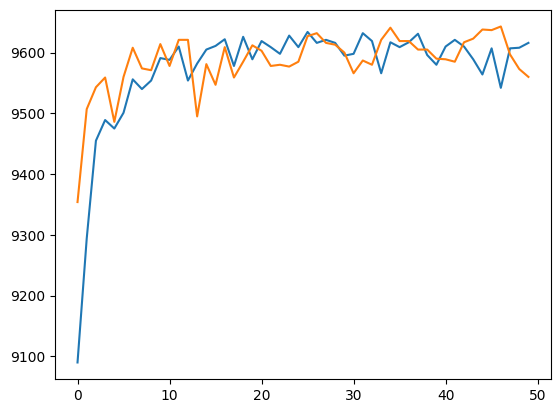

In [9]:
import matplotlib.pyplot as plt
plt.plot(evaluation_accuracy, label='Evaluation Accuracy with large weight initializer')
plt.plot(evaluation_accuracy_s, label='Evaluation Accuracy without large weight initializer')
# show the plot
plt.show()

# L1 vs L2 Regularization

Epoch 0 training complete
Accuracy on evaluation data: 9433 / 10000
Epoch 1 training complete
Accuracy on evaluation data: 9499 / 10000
Epoch 2 training complete
Accuracy on evaluation data: 9533 / 10000
Epoch 3 training complete
Accuracy on evaluation data: 9565 / 10000
Epoch 4 training complete
Accuracy on evaluation data: 9594 / 10000
Epoch 5 training complete
Accuracy on evaluation data: 9550 / 10000
Epoch 6 training complete
Accuracy on evaluation data: 9557 / 10000
Epoch 7 training complete
Accuracy on evaluation data: 9566 / 10000
Epoch 8 training complete
Accuracy on evaluation data: 9580 / 10000
Epoch 9 training complete
Accuracy on evaluation data: 9573 / 10000
Epoch 10 training complete
Accuracy on evaluation data: 9532 / 10000
Epoch 11 training complete
Accuracy on evaluation data: 9543 / 10000
Epoch 12 training complete
Accuracy on evaluation data: 9579 / 10000
Epoch 13 training complete
Accuracy on evaluation data: 9596 / 10000
Epoch 14 training complete
Accuracy on evalu

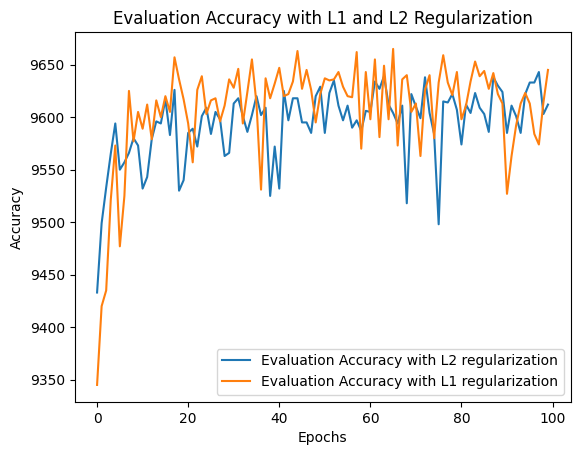

In [5]:
import network2
import mnist_loader
import matplotlib.pyplot as plt
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
evaluation_cost_L2, evaluation_accuracy_L2, training_cost_L2, training_accuracy_L2 = net.SGD(training_data, 100, 10, 0.5, lmbda=5.0, evaluation_data=validation_data, monitor_evaluation_accuracy=True)
net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
valuation_cost_L1, evaluation_accuracy_L1, training_cost_L1, training_accuracy_L1 = net.SGD(training_data, 100, 10, 0.5, lmbda=5.0, evaluation_data=validation_data, monitor_evaluation_accuracy=True, L2_regularized=False)
# can you increase the accuracy axis to from 9000 to 10000?
plt.plot(evaluation_accuracy_L2, label='Evaluation Accuracy with L2 regularization')
plt.plot(evaluation_accuracy_L1, label='Evaluation Accuracy with L1 regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Evaluation Accuracy with L1 and L2 Regularization')
# plt.ylim(9000, 10000)  # Set y-axis limits
plt.legend()
# background color
# show the plot
plt.show()

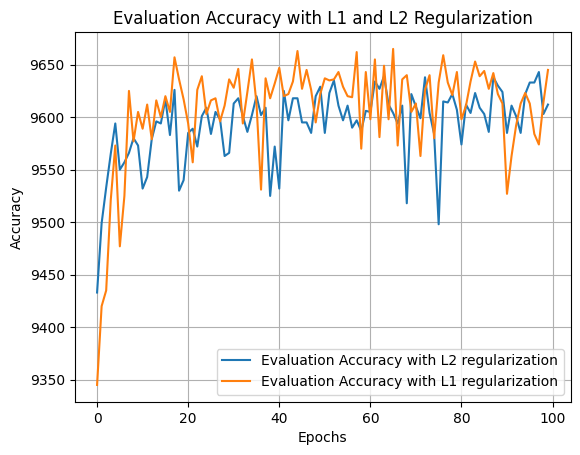

In [12]:
from scipy.signal import savgol_filter

# Apply smoothing (e.g., window size 5, polynomial order 2)
n = 4
smoothed_L2 = savgol_filter(evaluation_accuracy_L2, window_length=5, polyorder=n)
smoothed_L1 = savgol_filter(evaluation_accuracy_L1, window_length=5, polyorder=n)
plt.plot(smoothed_L2, label='Evaluation Accuracy with L2 regularization')
plt.plot(smoothed_L1, label='Evaluation Accuracy with L1 regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Evaluation Accuracy with L1 and L2 Regularization')
# plt.ylim(9000, 10000)  # Set y-axis limits
plt.legend()
plt.grid(True)         # Optional: add grid for readability
plt.show()



In [1]:
import network2
import mnist_loader
import matplotlib.pyplot as plt
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
evaluation_cost_L2, evaluation_accuracy_L2, training_cost_L2, training_accuracy_L2 = net.SGD(training_data, 100, 10, 0.5, lmbda=5.0, evaluation_data=validation_data, monitor_evaluation_accuracy=True)
net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)

Epoch 0 training complete
Accuracy on evaluation data: 9453 / 10000
Epoch 1 training complete
Accuracy on evaluation data: 9459 / 10000
Epoch 2 training complete
Accuracy on evaluation data: 9511 / 10000
Epoch 3 training complete
Accuracy on evaluation data: 9525 / 10000
Epoch 4 training complete
Accuracy on evaluation data: 9556 / 10000
Epoch 5 training complete
Accuracy on evaluation data: 9556 / 10000
Epoch 6 training complete
Accuracy on evaluation data: 9595 / 10000
Epoch 7 training complete
Accuracy on evaluation data: 9594 / 10000
Epoch 8 training complete
Accuracy on evaluation data: 9565 / 10000
Epoch 9 training complete
Accuracy on evaluation data: 9594 / 10000
Epoch 10 training complete
Accuracy on evaluation data: 9578 / 10000
Epoch 11 training complete
Accuracy on evaluation data: 9615 / 10000
Epoch 12 training complete
Accuracy on evaluation data: 9565 / 10000
Epoch 13 training complete
Accuracy on evaluation data: 9600 / 10000
Epoch 14 training complete
Accuracy on evalu

Text(0.5, 1.0, 'Derivative of Sigmoid Function')

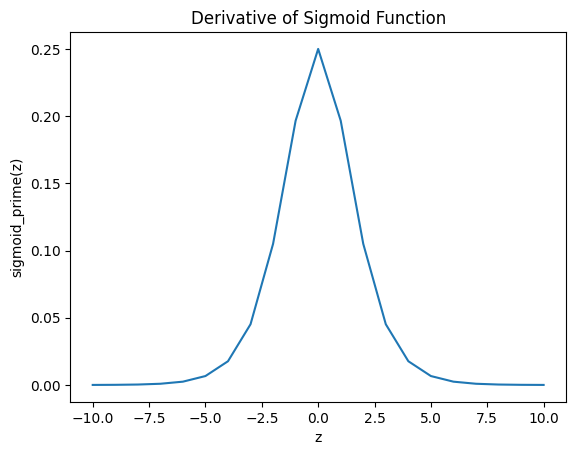

In [3]:
from network2 import sigmoid_prime
import matplotlib.pyplot as plt
sigmoid_prime_values = [sigmoid_prime(x) for x in range(-10, 11)]
plt.plot(range(-10, 11), sigmoid_prime_values, label='sigmoid_prime')
plt.xlabel('z')
plt.ylabel('sigmoid_prime(z)')
plt.title('Derivative of Sigmoid Function')

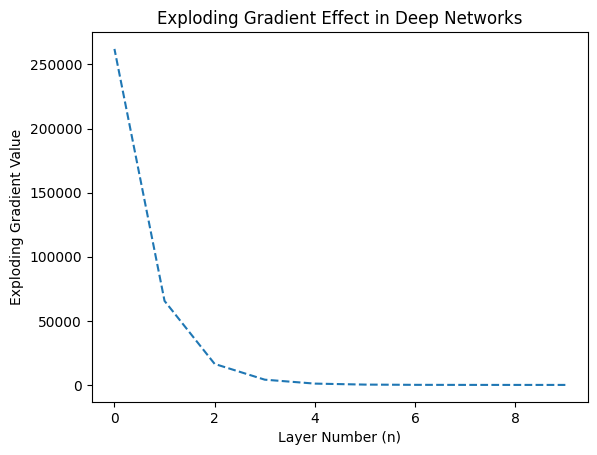

In [11]:
def vanishing_gradient(n):
    return (4 ** (n-1))

n_values = list(range(1, 11))
vanishing_gradients = [vanishing_gradient(n) for n in n_values]
layers = [10- n for n in n_values]
# plot the vanishing gradient values with the remaining layer from the end of layer
plt.plot(layers, vanishing_gradients, label='Exploding Gradient', linestyle='--')
plt.xlabel('Layer Number (n)')
plt.ylabel('Exploding Gradient Value')
plt.title('Exploding Gradient Effect in Deep Networks')
plt.show()